In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
import tensorflow as tf
tf.config.set_soft_device_placement(True)

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('plant_village', split=['train[:30%]', 'train[30%:40%]'], as_supervised=True, with_info=True)

In [ ]:
buffer_size = 5000
batch_size = 12
image_size = (64, 64)  # Reduce image resolution


In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, image_size) / 255.0
    return image, label

In [ ]:
num_classes = ds_info.features['label'].num_classes

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
tf.keras.Input(shape=(image_size[0], image_size[1], 3))

<KerasTensor shape=(None, 64, 64, 3), dtype=float32, sparse=False, name=keras_tensor_26>

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ds_train = ds_train.map(preprocess).cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3237 - loss: 2.5771 - val_accuracy: 0.6096 - val_loss: 1.3165
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6599 - loss: 1.1353 - val_accuracy: 0.7048 - val_loss: 0.9588
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7288 - loss: 0.8952 - val_accuracy: 0.7534 - val_loss: 0.8183
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7675 - loss: 0.7553 - val_accuracy: 0.7646 - val_loss: 0.7825
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7998 - loss: 0.6509 - val_accuracy: 0.7622 - val_loss: 0.7969


In [ ]:
loss, accuracy = model.evaluate(ds_test)
print("Test accuracy:", accuracy)

453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7617 - loss: 0.8082
Test accuracy: 0.7622467875480652


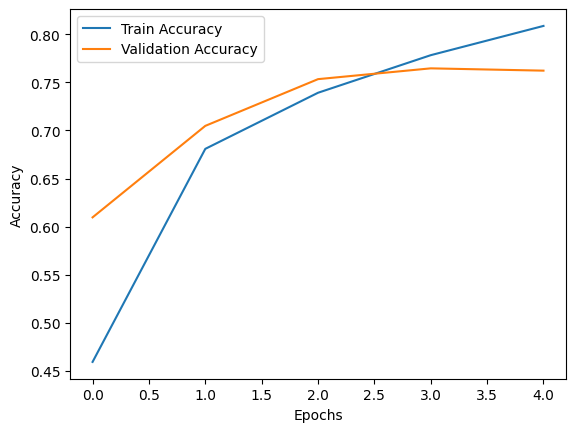

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for image, label in ds_test.unbatch().batch(1):
    test_image = image.numpy()[0]
    test_label = label.numpy()[0]
    break

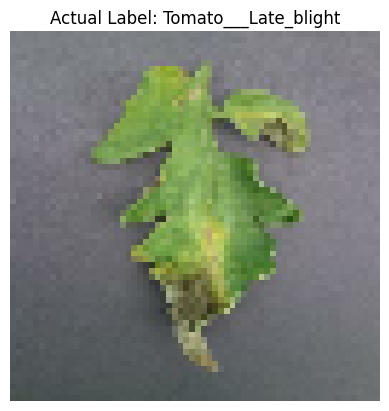

In [ ]:
plt.imshow(test_image)
plt.title("Actual Label: " + str(ds_info.features['label'].int2str(test_label)))
plt.axis('off')
plt.show()

In [ ]:
image_input = np.expand_dims(test_image, axis=0)
prediction = model.predict(image_input)
predicted_label = np.argmax(prediction)
print("Predicted Label:", str(ds_info.features['label'].int2str(predicted_label)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Predicted Label: Tomato___Late_blight


453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


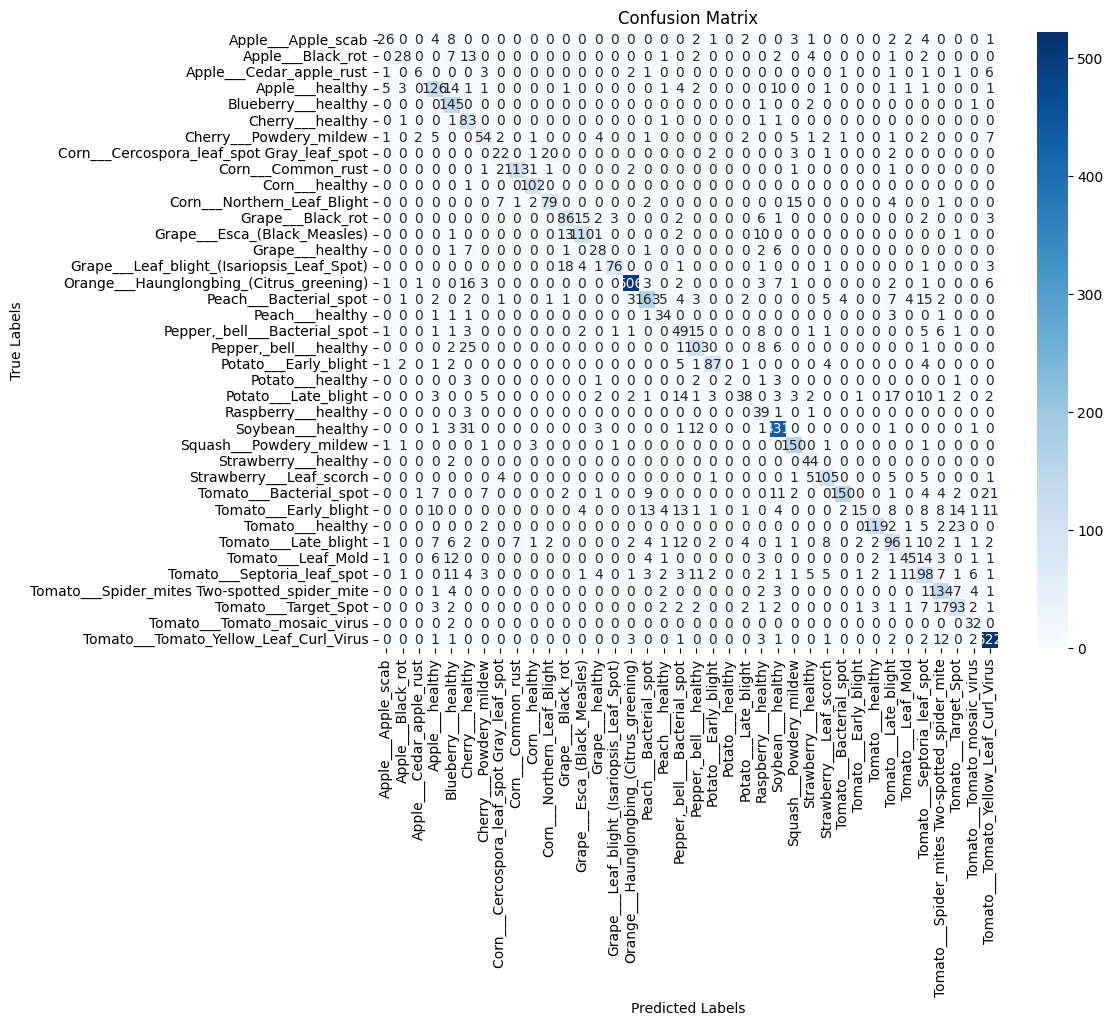

In [ ]:
predictions = model.predict(ds_test)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels for the entire test dataset
true_labels = []
for _, label in ds_test.unbatch():
  true_labels.append(label.numpy())

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=ds_info.features['label'].names,
            yticklabels=ds_info.features['label'].names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()